# Задача 1.2 #
*Рассмотреть систему с ограниченной очередью. Варьируя число операторов (вплоть до 15), построить семейства графиков от числа мест в очереди: вероятности отказа; математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди; коэффициента занятости мест в очереди. Варьируя число мест в очереди (вплоть до 15), построить семейства графиков от числа операторов: вероятности отказа; математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди; коэффициента занятости мест в очереди.*

## Исходные данные и подгрузка библиотек для расчета и визуализации

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [43]:
number = 1
day_of_birth = 9
month_of_birth = 1
#t_c среднее время между поступлением заявок, t_s - средняя продолжительность обслуживания заявки, t_w - среднее приемлемое время ожидания обслуживания
t_c = 10 + number
t_s = 40+ day_of_birth
t_w = 100 + month_of_birth
print(f"Tc = {t_c} секунд \nTs = {t_s} секунд\nTw = {t_w} секунд")

Tc = 11 секунд 
Ts = 49 секунд
Tw = 101 секунд


## Рассчетная и графическая часть

In [44]:
#lmbd - интенсивность поступления заявок, mu - интенсивность обслуживания заявок
lmbd=1/t_c
mu=1/t_s

lmbd_mu = lmbd/mu

print(f"Интенсивность поступления заявок: {lmbd} заявок/секунда\n\
Интенсивность обслуживания заявок: {mu} обслуженных заявок/секунда\n\
Приведенная интенсивность обслуживания заявок: {lmbd_mu} обслуженных заявок/секунда\n")

Интенсивность поступления заявок: 0.09090909090909091 заявок/секунда
Интенсивность обслуживания заявок: 0.02040816326530612 обслуженных заявок/секунда
Приведенная интенсивность обслуживания заявок: 4.454545454545455 обслуженных заявок/секунда



**Варьируя(вплоть до 15) n и m - число операторов и место в очереди соответственно, найдем Pотказа, M(n), Kзагр...**

In [45]:
n, m = 15, 15 #число операторов и мест в очереди

In [46]:
pi_p0 = np.array([pow(lmbd_mu,i)/math.factorial(i) for i in range(1,n+1)])

p_nr_p0 = np.array([pow(lmbd_mu,i+r)/(pow(i,r)*math.factorial(i)) for i in range(1,n+1) for r in range(1,m+1)]).reshape(15,15)

p_0 = np.array([1/(1+(pi_p0[0:i+1].sum())+sum(p_nr_p0[i][:r+1])) for i in range(0,n) for r in range(0,m)]).reshape(15,15)

#Вероятность отказа
p_otk = np.array([ (pow(lmbd_mu,i+r+2)/(pow(i+1,r+1)*math.factorial(i+1)))*p_0[i][r] for i in range(0,n) for r in range(0,m)]).reshape(15,15)

#Число операторов и занятых каналов
n_it = np.arange(1,n+1)
m_it = np.arange(1,m+1)

#Матожидание числа занятых каналов
m_n = np.array([(np.dot(n_it[:i+1],pi_p0[:i+1])+ (i+1)*p_nr_p0[i][:r+1].sum())*p_0[i][r] for i in range (0,n) for r in range(0,m)]).reshape(15,15)    

#Матожидание длины очереди
m_q = np.array([np.dot(m_it[:r+1],p_nr_p0[i][:r+1])*p_0[i][r] for i in range (0,n) for r in range(0,m)]).reshape(15,15)

#Коэффициент загрузки операторов
k_z = np.array([(m_n[i][j])/(i+1) for i in range (0,n) for j in range(0,m)]).reshape(15,15)

#Коэффициент занятости в очереди
k_q = np.array([(m_q[i][j])/(j+1) for i in range (0,n) for j in range(0,m)]).reshape(15,15)

#Вероятность образования очереди
p_q = np.array([p_nr_p0[i][:r+1].sum()*p_0[i][r] for i in range (0,n) for r in range(0,m)]).reshape(15,15)   

#m_n

In [47]:
import pandas as pd
table_otkaz = pd.DataFrame(p_otk, index=n_it, columns=m_it)
table_m_n = pd.DataFrame(m_n, index=n_it, columns=m_it)
table_k_z = pd.DataFrame(k_z, index=n_it, columns=m_it)
table_p_q = pd.DataFrame(p_q, index=n_it, columns=m_it)
table_m_q = pd.DataFrame(m_q, index=n_it, columns=m_it)
table_k_q = pd.DataFrame(k_q, index=n_it, columns=m_it)


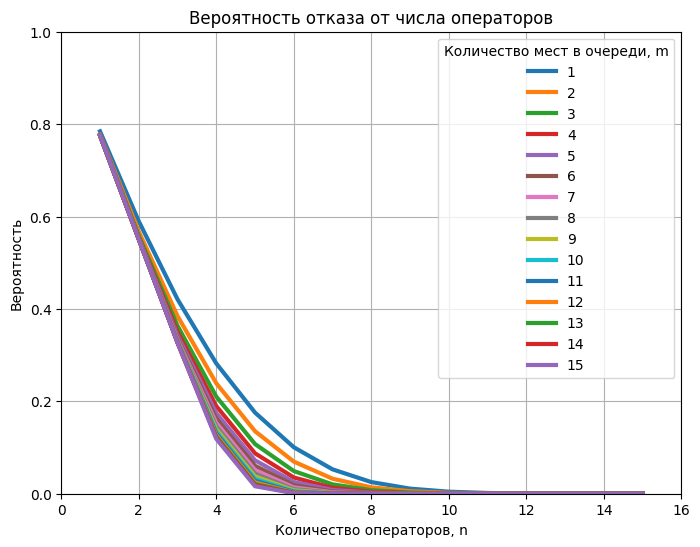

In [48]:
# Вероятность отказа от числа операторов
table_otkaz.plot(title='Вероятность отказа от числа операторов',
                ylabel='Вероятность',
                xlabel='Количество операторов, n',
                xlim= [0,16],
                ylim= [0,1],
                grid=True,
                linewidth=3.0,
                figsize=(8,6))
#plt.axhline (y=0.01, color='black')
plt.legend(title='Количество мест в очереди, m');

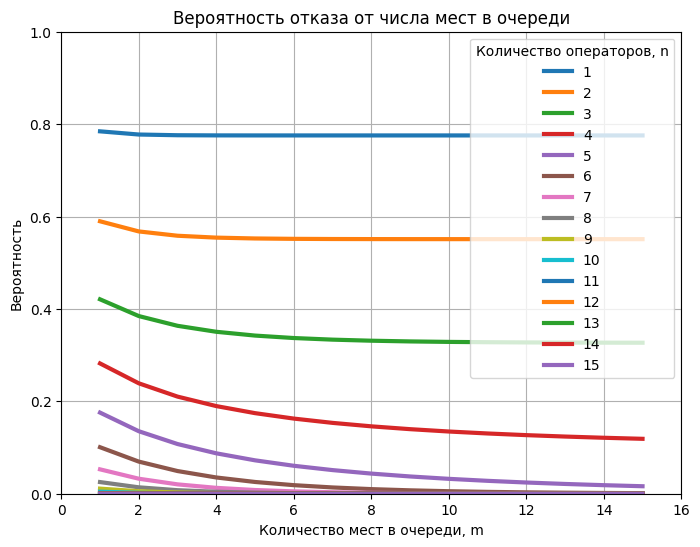

In [49]:
# Вероятность отказа от числа операторов
table_otkaz.T.plot(title='Вероятность отказа от числа мест в очереди',
                ylabel='Вероятность',
                xlabel='Количество мест в очереди, m',
                xlim= [0,16],
                ylim= [0,1],
                grid=True,
                linewidth=3.0,
                figsize=(8,6))
#plt.axhline (y=0.01, color='black')
plt.legend(title='Количество операторов, n');

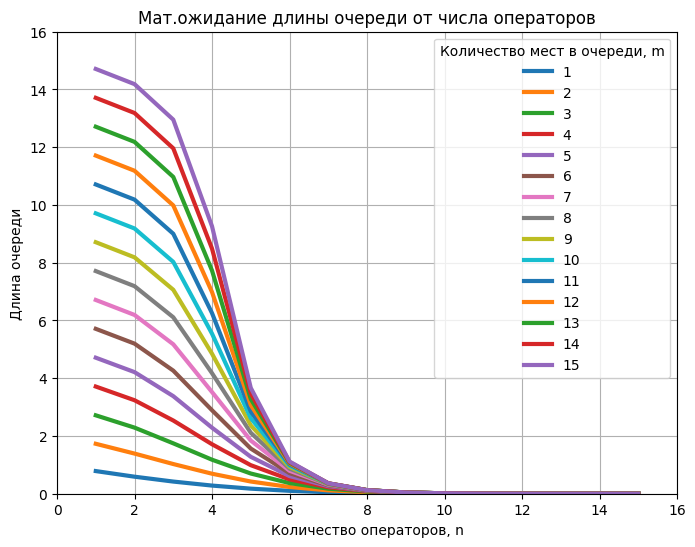

In [50]:
# Мат. ожидание длины очереди от числа операторов
table_m_q.plot(title='Мат.ожидание длины очереди от числа операторов',
                ylabel='Длина очереди',
                xlabel='Количество операторов, n',
                xlim=[0,16],
                ylim=[0,16],
                grid=True,
                linewidth=3.0,
                figsize=(8,6))
plt.legend(title='Количество мест в очереди, m')

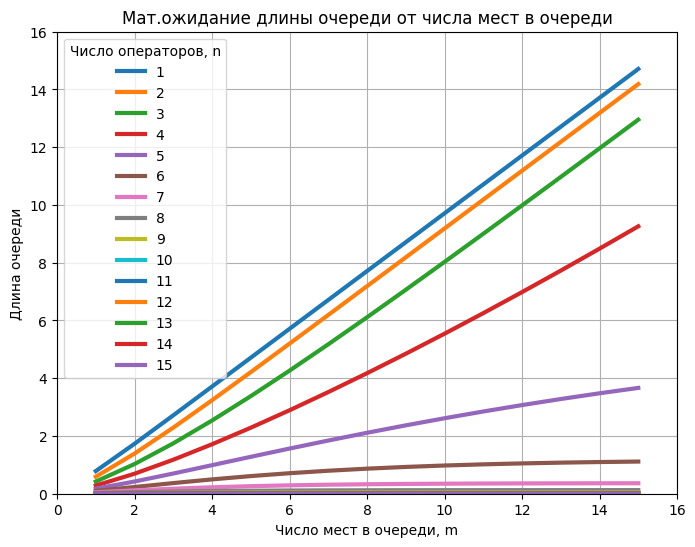

In [51]:
# Мат. ожидание длины очереди от числа мест в очереди
table_m_q.T.plot(title='Мат.ожидание длины очереди от числа мест в очереди',
                ylabel='Длина очереди',
                xlabel='Число мест в очереди, m',
                xlim=[0,16],
                ylim=[0,16],
                grid=True,
                linewidth=3.0,
                figsize=(8,6))
plt.legend(title='Число операторов, n')

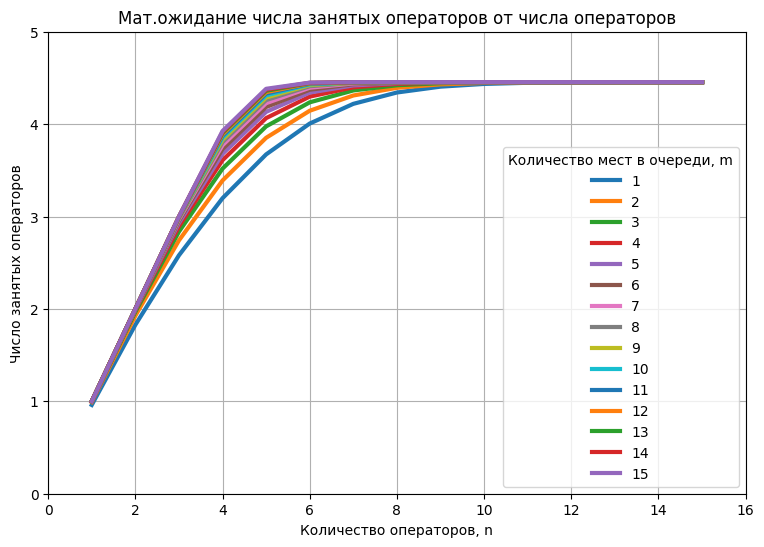

In [52]:
# Мат ожидание числа занятых операторов от числа операторов
table_m_n.plot(title='Мат.ожидание числа занятых операторов от числа операторов',
                ylabel='Число занятых операторов',
                xlabel='Количество операторов, n',
                xlim=[0,16],
                ylim=[0,5],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
plt.legend(title='Количество мест в очереди, m')

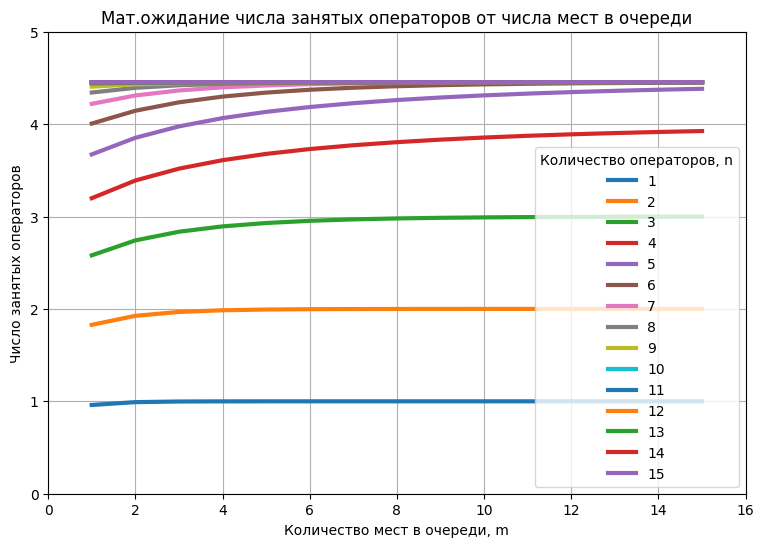

In [53]:
# Мат ожидание числа занятых каналов от числа мест в очереди
table_m_n.T.plot(title='Мат.ожидание числа занятых операторов от числа мест в очереди',
                ylabel='Число занятых операторов',
                xlabel='Количество мест в очереди, m',
                xlim=[0,16],
                ylim=[0,5],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
plt.legend(title='Количество операторов, n');

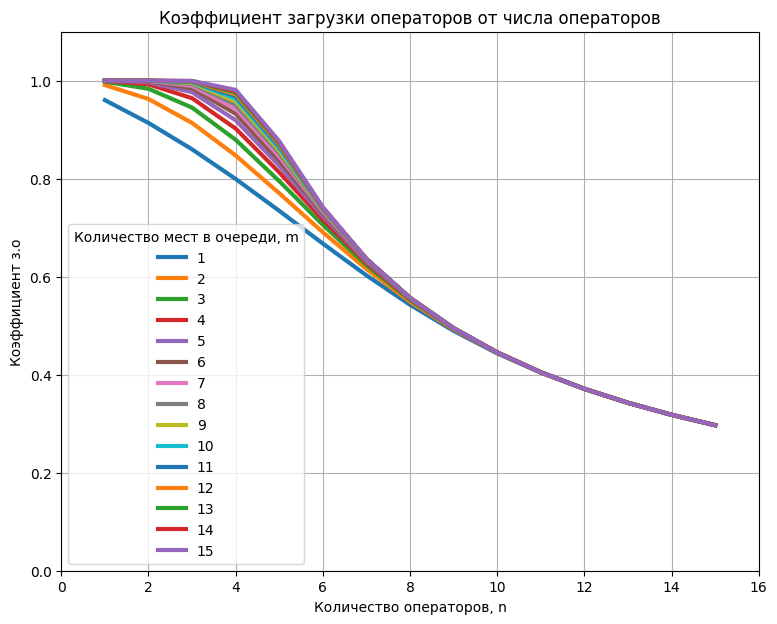

In [54]:
# Коэффициент загрузки операторов от числа операторов
table_k_z.plot(title='Коэффициент загрузки операторов от числа операторов',
                ylabel='Коэффициент з.о',
                xlabel='Количество операторов, n',
                xlim=[0,16],
                ylim=[0,1.1],
                grid=True,
                linewidth=3.0,
                figsize=(9,7))
plt.legend(title='Количество мест в очереди, m')

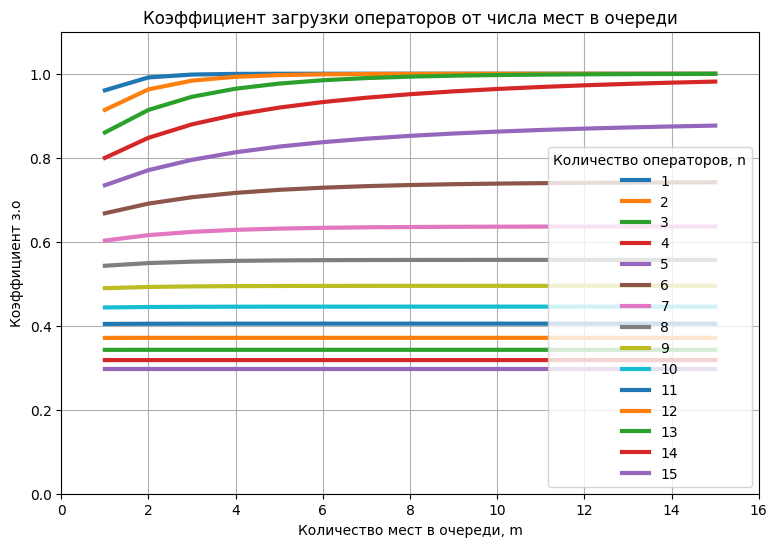

In [55]:
# Коэффициент загрузки операторов от числа мест в очереди
table_k_z.T.plot(title='Коэффициент загрузки операторов от числа мест в очереди',
                ylabel='Коэффициент з.о',
                xlabel='Количество мест в очереди, m',
                xlim=[0,16],
                ylim=[0,1.1],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
plt.legend(title='Количество операторов, n')

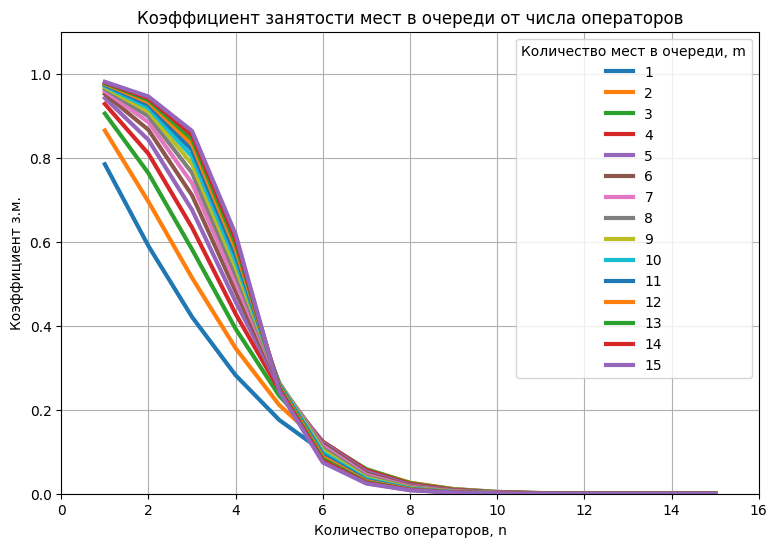

In [56]:
# Коэффициент занятости мест в очереди от числа операторов
table_k_q.plot(title='Коэффициент занятости мест в очереди от числа операторов',
                ylabel='Коэффициент з.м.',
                xlabel='Количество операторов, n',
                xlim=[0,16],
                ylim=[0,1.1],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
plt.legend(title='Количество мест в очереди, m')

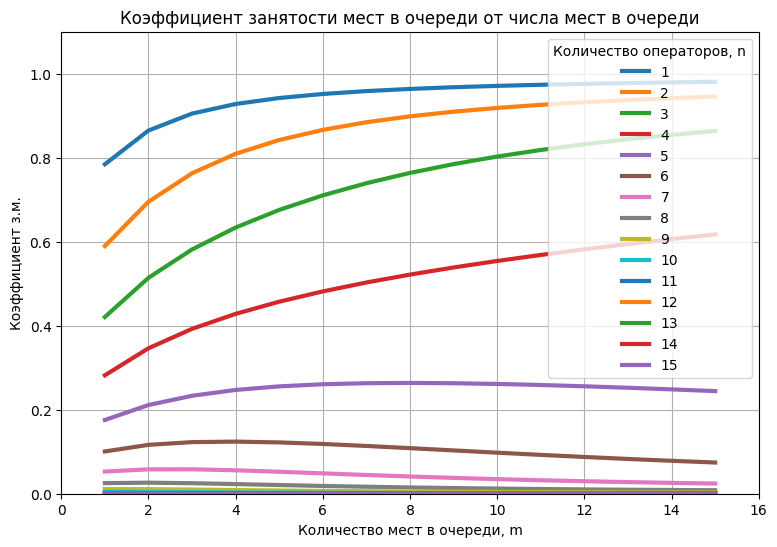

In [57]:
# Коэффициент занятости мест в очереди от числа мест в очереди
table_k_q.T.plot(title='Коэффициент занятости мест в очереди от числа мест в очереди',
                ylabel='Коэффициент з.м.',
                xlabel='Количество мест в очереди, m',
                xlim=[0,16],
                ylim=[0,1.1],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
plt.legend(title='Количество операторов, n')

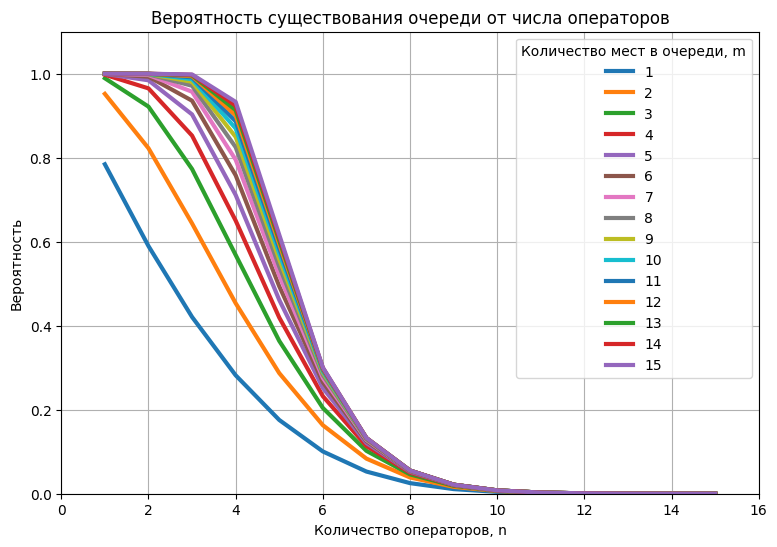

In [58]:
# Вероятность образования очереди от числа операторов
table_p_q.plot(title='Вероятность существования очереди от числа операторов',
                ylabel='Вероятность',
                xlabel='Количество операторов, n',
                xlim=[0,16],
                ylim=[0,1.1],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
#plt.axhline (y=0.01, color='black')
plt.legend(title='Количество мест в очереди, m');

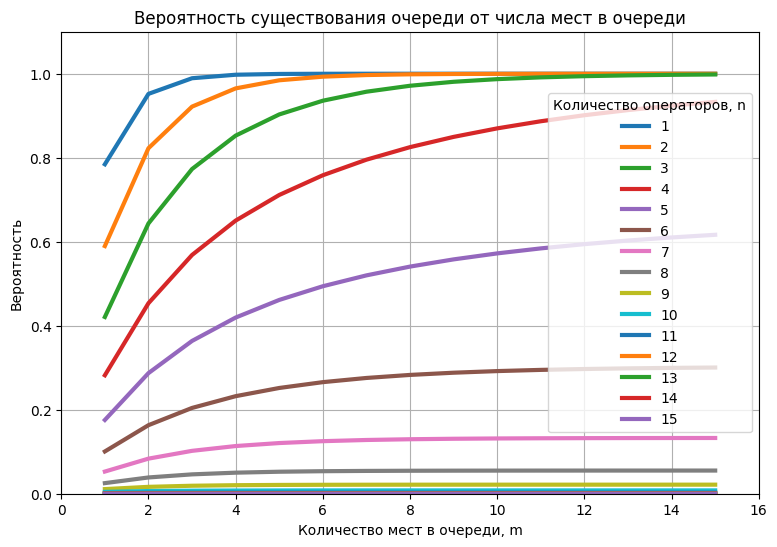

In [59]:
# Вероятность образования очереди от мест в очереди
table_p_q.T.plot(title='Вероятность существования очереди от числа мест в очереди',
                ylabel='Вероятность',
                xlabel='Количество мест в очереди, m',
                xlim=[0,16],
                ylim=[0,1.1],
                grid=True,
                linewidth=3.0,
                figsize=(9,6))
#plt.axhline (y=0.01, color='black')
plt.legend(title='Количество операторов, n');